# 6.4: Supervised Machine Learning: Regression

## Table of Content:¶

### Task 1 - Install the scikit-learn library.

### Task 2 - Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

### Task 3 -Clean your data so that it’s ready for analysis.

### Tas 4 - Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

### Task 5 - State your hypothesis in a markdown cell within your Jupyter notebook.

### Task 6 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

### Task 7 - Split the data into two sets: a training set and a test set.

### Task 8 - Run a linear regression on the data.

- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

### Task 9 - Create a plot that shows the regression line on the test set.

### Task 10 - Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### Task 11 - Check the model performance statistics—MSE and R2 score.

### Task 12 - Compare the predicted y values with the actual y values in a dataframe.

### Task 13 - Include your thoughts on how well the model performed on the test set in a markdown cell.

- Include any reflections you have on the impact of possible data bias.

***
***

## Task 1 and Task 2:

### - Install the scikit-learn library.
### - Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Data Set

In [2]:
path = r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6\Data Sets'

In [3]:
gun_violence_df = pd.read_csv(os.path.join(path, 'Prepared', 'new_dataset.csv'), index_col = False)

## Task 3 - Clean your data so that it’s ready for analysis.

### EDA

In [4]:
# Check data set
gun_violence_df

,Unnamed: 0,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,...,victim_0-17,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+
0,0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1,1,460726,2013,1,1,Tuesday,California,Hawthorne,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,...,0,0,3,0,0,0,1,1,0,0
3,3,478925,2013,1,5,Saturday,Colorado,Aurora,NaN,4,...,0,1,1,1,0,0,0,1,0,0
4,4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018,3,31,Saturday,Louisiana,Rayne,1.0,0,...,0,0,0,0,0,0,1,0,0,0
239673,239673,1083139,2018,3,31,Saturday,Louisiana,Natchitoches,1.0,1,...,0,1,0,0,0,0,0,0,0,0
239674,239674,1083151,2018,3,31,Saturday,Louisiana,Gretna,1.0,0,...,0,1,0,0,0,0,0,0,0,0
239675,239675,1082514,2018,3,31,Saturday,Texas,Houston,1.0,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
gun_violence_df.tail()

,Unnamed: 0,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,...,victim_0-17,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+
239672,239672,1083142,2018,3,31,Saturday,Louisiana,Rayne,1.0,0,...,0,0,0,0,0,0,1,0,0,0
239673,239673,1083139,2018,3,31,Saturday,Louisiana,Natchitoches,1.0,1,...,0,1,0,0,0,0,0,0,0,0
239674,239674,1083151,2018,3,31,Saturday,Louisiana,Gretna,1.0,0,...,0,1,0,0,0,0,0,0,0,0
239675,239675,1082514,2018,3,31,Saturday,Texas,Houston,1.0,1,...,0,0,1,0,0,0,0,0,0,0
239676,239676,1081940,2018,3,31,Saturday,Maine,Norridgewock,2.0,2,...,0,0,0,1,0,0,0,0,0,1


In [6]:
# Check columns names

gun_violence_df.columns

Index(['Unnamed: 0', 'incident_id', 'year', 'month', 'day', 'day_of_week',
       'state', 'city_or_county', 'n_guns_involved', 'n_killed', 'n_injured',
       'victim_count', 'suspect_count', 'male_victims_count',
       'female_victims_count', 'male_suspects_count', 'female_suspects_count',
       'victim_0-17', 'victim_18-30', 'victim_31-45', 'victim_46-60',
       'victim_61+', 'suspect_0-17', 'suspect_18-30', 'suspect_31-45',
       'suspect_46-60', 'suspect_61+'],
      dtype='object')

In [8]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             239677 non-null  int64  
 1   incident_id            239677 non-null  int64  
 2   year                   239677 non-null  int64  
 3   month                  239677 non-null  int64  
 4   day                    239677 non-null  int64  
 5   day_of_week            239677 non-null  object 
 6   state                  239677 non-null  object 
 7   city_or_county         239677 non-null  object 
 8   n_guns_involved        140226 non-null  float64
 9   n_killed               239677 non-null  int64  
 10  n_injured              239677 non-null  int64  
 11  victim_count           239677 non-null  int64  
 12  suspect_count          239677 non-null  int64  
 13  male_victims_count     239677 non-null  int64  
 14  female_victims_count   239677 non-nu

In [10]:
# Check shape
gun_violence_df.shape

(239677, 27)

In [11]:
#Checked for duplicates
gun_violence_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
239672    False
239673    False
239674    False
239675    False
239676    False
Length: 239677, dtype: bool

In [12]:
#Checked for missing values 
gun_violence_df.isnull().sum()

Unnamed: 0                   0
incident_id                  0
year                         0
month                        0
day                          0
day_of_week                  0
state                        0
city_or_county               0
n_guns_involved          99451
n_killed                     0
n_injured                    0
victim_count                 0
suspect_count                0
male_victims_count           0
female_victims_count         0
male_suspects_count          0
female_suspects_count        0
victim_0-17                  0
victim_18-30                 0
victim_31-45                 0
victim_46-60                 0
victim_61+                   0
suspect_0-17                 0
suspect_18-30                0
suspect_31-45                0
suspect_46-60                0
suspect_61+                  0
dtype: int64

In [13]:
#Deleted unnecessary columns
gun_violence_df = gun_violence_df.drop(columns=['Unnamed: 0'])

The 'n_guns_involved' column contains a significant number of missing values (99,451 entries). For this case, i will fill these missing values with the median value of the 'n_guns_involved' column. 

In [53]:
# Checking for missing values and data types in the relevant columns
relevant_columns = ['year', 'n_guns_involved', 'n_killed', 'victim_0-17', 'victim_18-30', 'suspect_18-30']
data_selected = gun_violence_df[relevant_columns]

In [54]:
# Filling missing values in 'n_guns_involved' with the median value
median_guns_involved = data_selected['n_guns_involved'].median()
data_selected['n_guns_involved'].fillna(median_guns_involved, inplace=True)

# Confirming that there are no more missing values
missing_values_updated = data_selected.isnull().sum()

missing_values_updated


C:\Users\facun\AppData\Local\Temp\ipykernel_22304\3829805920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['n_guns_involved'].fillna(median_guns_involved, inplace=True)


year               0
n_guns_involved    0
n_killed           0
victim_0-17        0
victim_18-30       0
suspect_18-30      0
dtype: int64

## Task 4 - Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

#### Look for outliers extreme values

In [16]:
incidents_per_state = gun_violence_df.groupby('state')['incident_id'].nunique().reset_index(name='incident_count')

In [22]:
incidents_per_state

,state,incident_count
0,Alabama,5471
1,Alaska,1349
2,Arizona,2328
3,Arkansas,2842
4,California,16306
5,Colorado,3201
6,Connecticut,3067
7,Delaware,1685
8,District of Columbia,3195
9,Florida,15029


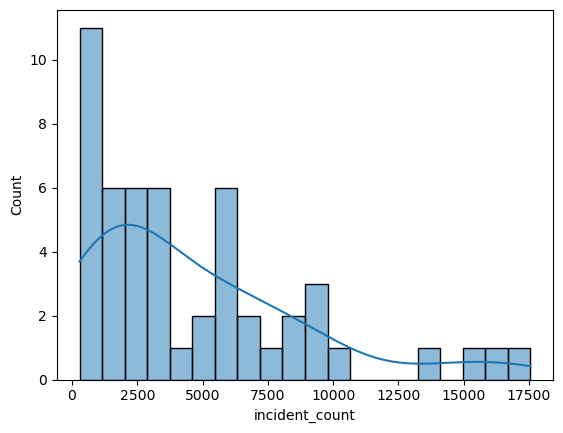

In [24]:
#Created a histogram for extreme values for Incidents per State
hist_incidents_per_state = sns.histplot(incidents_per_state['incident_count'], bins = 20, kde = True)

In [28]:
incidents_per_month = gun_violence_df.groupby('month')['incident_id'].nunique().reset_index(name='incident_count')

In [30]:
incidents_per_month

,month,incident_count
0,1,23091
1,2,18841
2,3,22640
3,4,18628
4,5,19930
5,6,18755
6,7,21126
7,8,21040
8,9,19656
9,10,19890


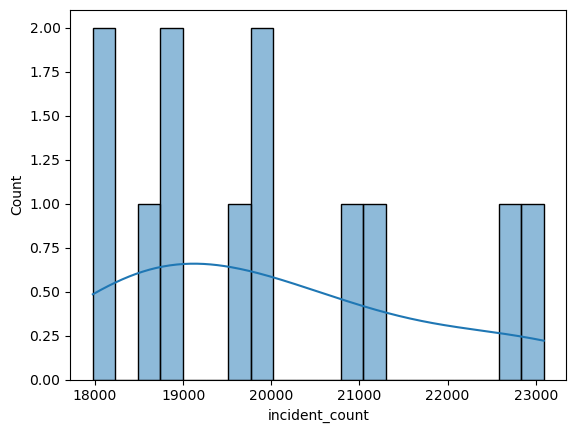

In [29]:
#Created a histogram for extreme values for Incidents per month
hist_incidents_per_month = sns.histplot(incidents_per_month['incident_count'], bins = 20, kde = True)

In [42]:
incidents_per_year = gun_violence_df.groupby('year')['incident_id'].nunique().reset_index(name='incident_count')

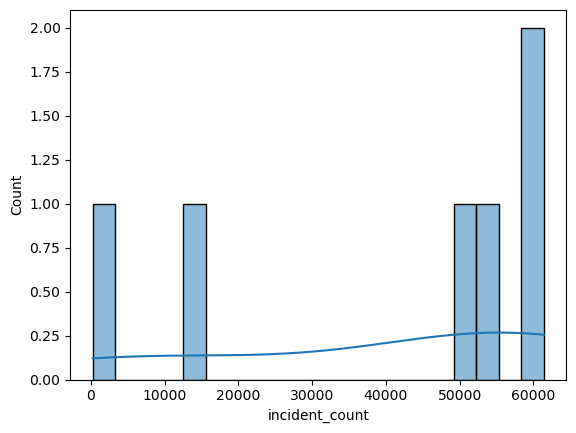

In [45]:
#Created a histogram for extreme values for Incidents per year
hist_incidents_per_year = sns.histplot(incidents_per_year['incident_count'], bins = 20, kde = True)

In [46]:
incidents_per_year

,year,incident_count
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802


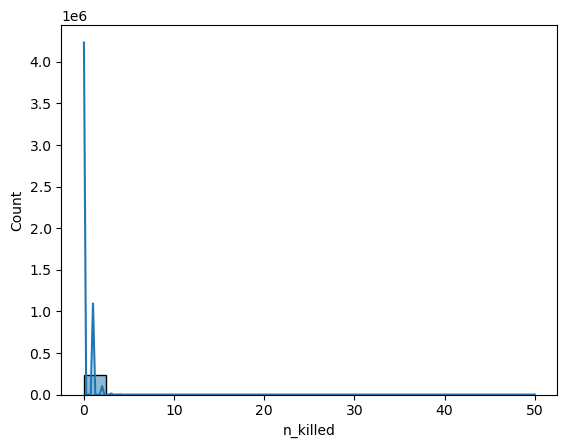

In [27]:
#Created a histogram for extreme values for number of people killed
hist_n_killed = sns.histplot(gun_violence_df['n_killed'], bins = 20, kde = True)

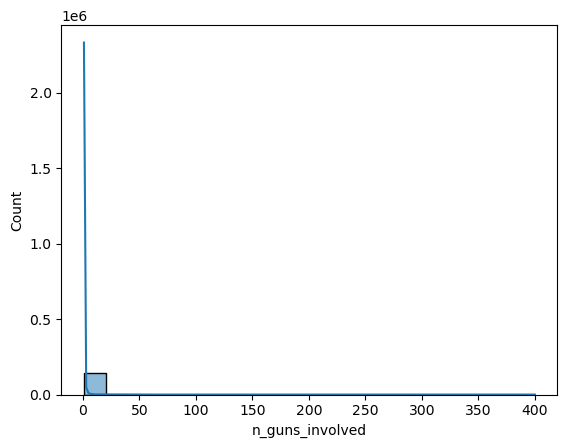

In [25]:
#Created a histogram for extreme values for number of guns involved
hist_n_guns_involved = sns.histplot(gun_violence_df['n_guns_involved'], bins = 20, kde = True)

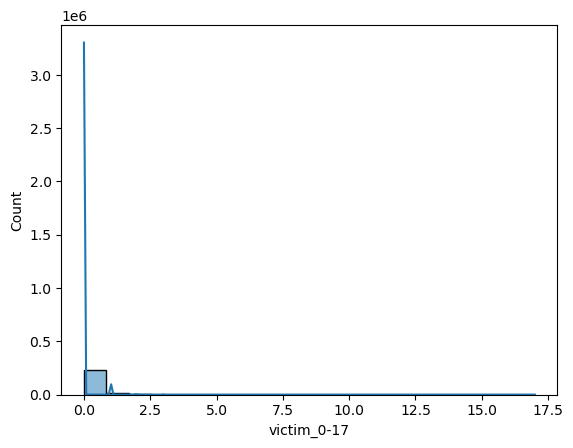

In [56]:
#Created a histogram for extreme values for number of guns involved
hist_n_injured = sns.histplot(gun_violence_df['victim_0-17'], bins = 20, kde = True)

In [20]:
gun_violence_df['participants_per_incident'] = gun_violence_df['victim_count'].fillna(0) + gun_violence_df['suspect_count'].fillna(0)


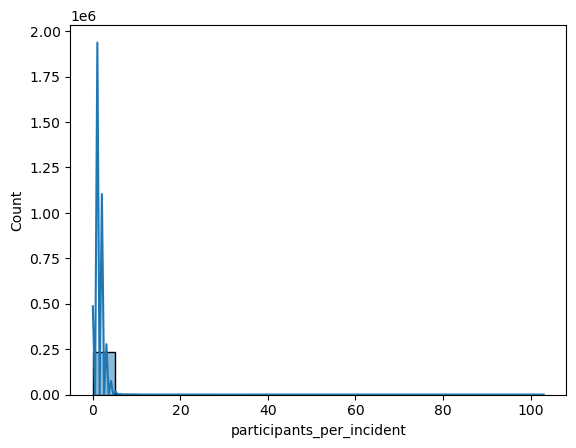

In [21]:
#Created a histogram for extreme values for number of guns involved
participants_per_incident = sns.histplot(gun_violence_df['participants_per_incident'], bins = 20, kde = True)

### Exploring Relationships

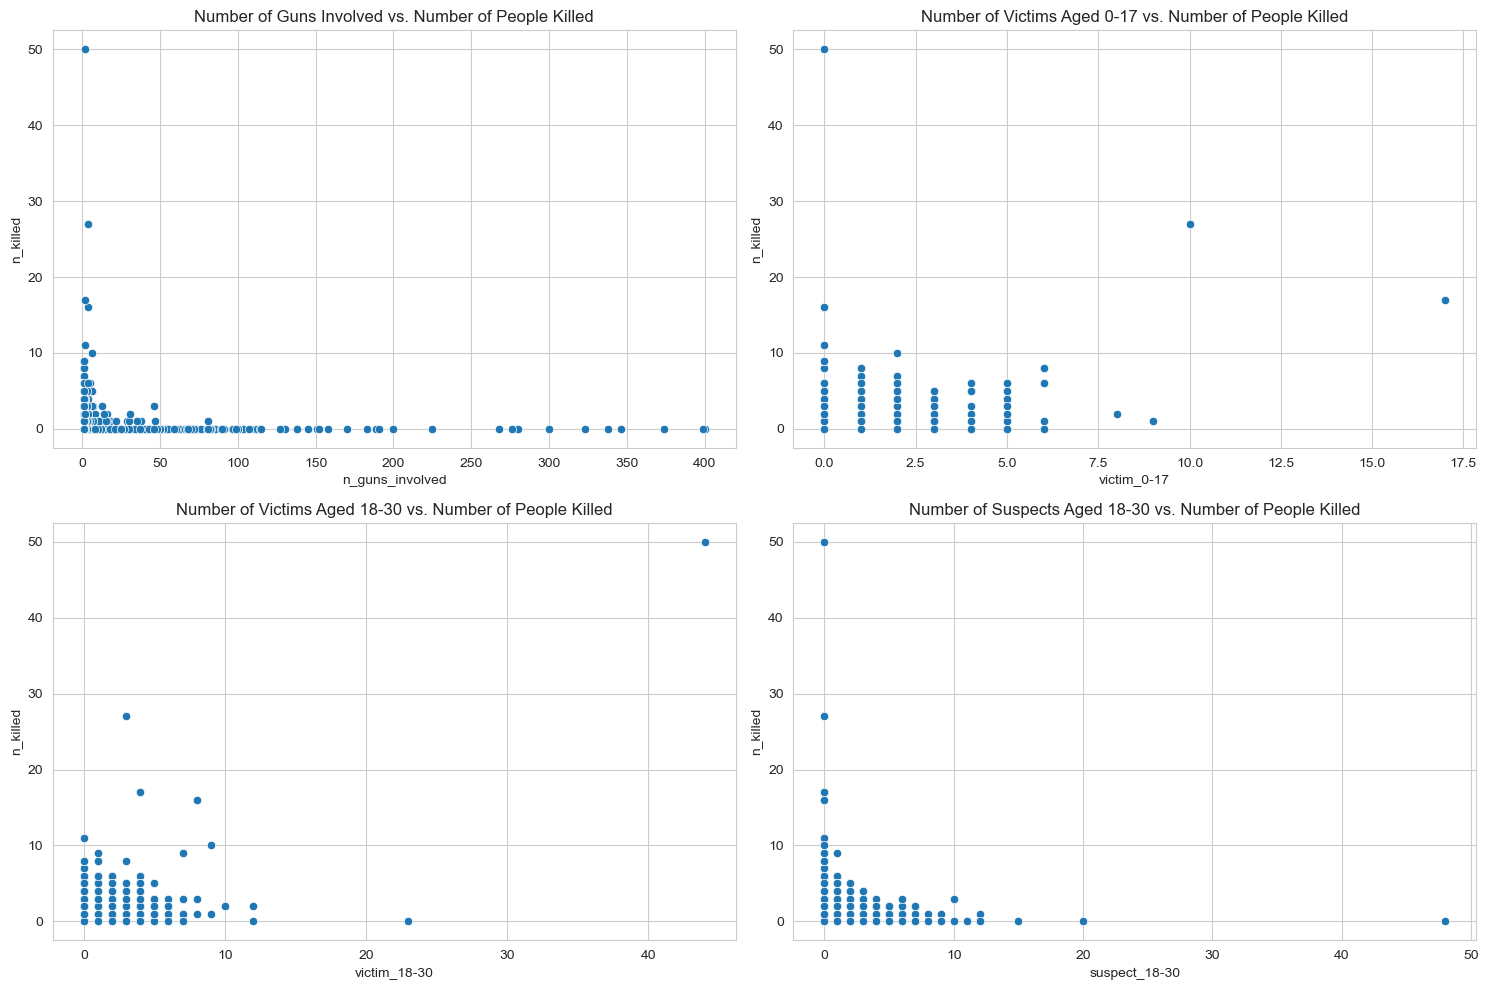

In [57]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating scatterplots
plt.figure(figsize=(15, 10))

# Scatterplot: Number of Guns Involved vs. Number of People Killed
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_selected, x='n_guns_involved', y='n_killed')
plt.title('Number of Guns Involved vs. Number of People Killed')

# Scatterplot: Number of Victims Aged 0-17 vs. Number of People Killed
plt.subplot(2, 2, 2)
sns.scatterplot(data=data_selected, x='victim_0-17', y='n_killed')
plt.title('Number of Victims Aged 0-17 vs. Number of People Killed')

# Scatterplot: Number of Victims Aged 18-30 vs. Number of People Killed
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_selected, x='victim_18-30', y='n_killed')
plt.title('Number of Victims Aged 18-30 vs. Number of People Killed')

# Scatterplot: Number of Suspects Aged 18-30 vs. Number of People Killed
plt.subplot(2, 2, 4)
sns.scatterplot(data=data_selected, x='suspect_18-30', y='n_killed')
plt.title('Number of Suspects Aged 18-30 vs. Number of People Killed')

plt.tight_layout()
plt.show()


The scatterplots shows visual insights into the relationships between various variables in your dataset:

1. **Number of Guns Involved vs. Number of People Killed:** This plot shows a scattered relationship between the number of guns involved in an incident and the number of fatalities. It indicates that there might not be a clear linear relationship, suggesting that the number of guns might not be a strong predictor of the number of people killed.


2. **Number of Victims Aged 0-17 vs. Number of People Killed:** Similarly, this relationship appears scattered, suggesting that the number of young victims might not strongly correlate with the total number of fatalities in an incident.


3. **Number of Victims Aged 18-30 vs. Number of People Killed:** This plot also shows a scattered distribution, indicating a potential lack of a strong linear relationship between these variables.


4. **Number of Suspects Aged 18-30 vs. Number of People Killed:** Like the other plots, this one does not show a clear linear pattern, suggesting that the age group of suspects may not be a significant predictor of the number of fatalities.

## Task 5 - State your hypothesis in a markdown cell within your Jupyter notebook.

### "The number of guns involved in an incident has a linear relationship with the number of fatalities."

## Task 6 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [58]:
# Selecting the independent (X) and dependent (y) variables
X = data_selected[['n_guns_involved']]
y = data_selected['n_killed']

In [61]:
X

,n_guns_involved
0,1.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
239672,1.0
239673,1.0
239674,1.0
239675,1.0


In [62]:
y

0         0
1         1
2         1
3         4
4         2
         ..
239672    0
239673    1
239674    0
239675    1
239676    2
Name: n_killed, Length: 239677, dtype: int64

## Task 7 - Split the data into two sets: a training set and a test set

In [59]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 8 - Run a linear regression on the data.

### - First, fit the model you created to the training set.
### - Then, create a prediction for y on the test set.

## Task 9 - Create a plot that shows the regression line on the test set.


In [64]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


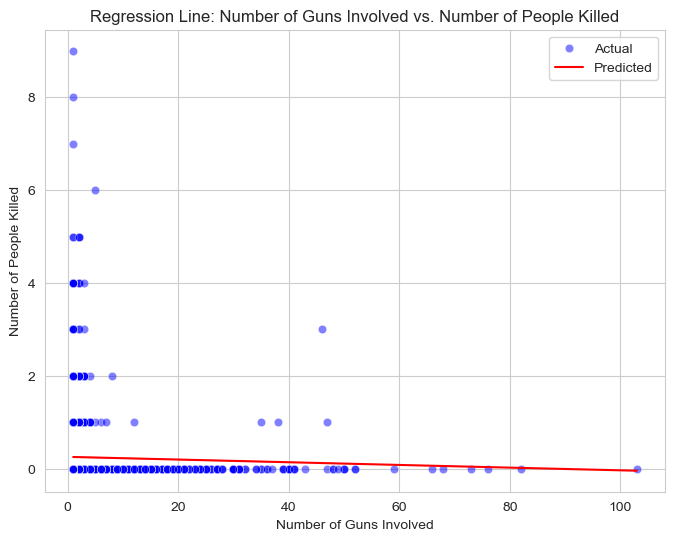

(0.25549553485429194, 0.0006048017533155647)

In [68]:

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the regression line over the test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['n_guns_involved'], y=y_test, color='blue', alpha=0.5, label='Actual')
sns.lineplot(x=X_test['n_guns_involved'], y=y_pred, color='red', label='Predicted')
plt.title('Regression Line: Number of Guns Involved vs. Number of People Killed')
plt.xlabel('Number of Guns Involved')
plt.ylabel('Number of People Killed')
plt.legend()
plt.show()

mse, r2


## Task 10 - Write your own interpretation of how well the line appears to fit the data in a markdown cell

#### The analysis indicates that the hypothesis "more guns involved in an incident means more people killed" does not align well with the data. The low R² score suggests that the model, which predicts the number of fatalities based on the number of guns involved, fails to capture the complexity of the situation. This implies that there are likely other significant factors influencing the number of fatalities in these incidents that our model does not account for.

## Task 11 - Check the model performance statistics—MSE and R2 score.

In [ ]:
# Calculating performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
# Extracting the slope (coefficient) of the linear regression model
slope = model.coef_[0]

In [67]:
print('Slope: ', slope)
print('MSE: ', mse)
print('R2: ', r2)

Slope:  -0.0028982792779028753
MSE:  0.25549553485429194
R2:  0.0006048017533155647


### Values from the linear regression model:

- Slope of the Regression Line: $ 0.0029$  
- Mean Squared Error (MSE): $0.2555$
- R² Score: $0.00060$


### Interpretation:

- **The slope of −0.0029** indicates the change in the **dependent variable ('n_killed')** for each unit increase in the **independent variable ('n_guns_involved')**. A negative slope suggests a very slight decrease in the number of fatalities with an increase in the number of guns involved, but this change is extremely small.


- **The Mean Squared Error (MSE) of 0.25550.2555** is a measure of the average squared difference between the actual and predicted values. The closer this value is to zero, the better the model fits the data. In this case, it suggests moderate average errors in the predictions.


- **The R² score of 0.00060.0006** indicates that only a very small fraction of the variance in the dependent variable is predictable from the independent variable. This low value suggests that the model does not explain the variability in the number of people killed very well and is not a good fit for the data. 

## Task 12 - Compare the predicted y values with the actual y values in a dataframe.

In [70]:
# Creating a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

comparison_df


,Actual,Predicted
0,0,0.253067
1,1,0.253067
2,0,0.253067
3,0,0.253067
4,1,0.253067
...,...,...
47931,0,0.253067
47932,2,0.253067
47933,0,0.253067
47934,0,0.253067


## Task 13 - Include your thoughts on how well the model performed on the test set in a markdown cell.

### - Include any reflections you have on the impact of possible data bias.


#### Reflecting on the approach, the method of handling missing data (specifically, filling missing values with the median) might have influenced the results. Additionally, the complexity of real-life situations, like incidents involving firearms, usually involves multiple factors. Our simple linear model may not adequately capture these complexities. This underscores the need for more comprehensive models and the consideration of a wider range of variables when analyzing complex real-world issues, such as gun violence.